## My Professional LittleBig Data 😉

With 21 years of experience working on multiple projects, it was very difficult for me to teach in an agile, clear and concise way all relevant aspects of my professional life.

As a learning method in the world of BigData, I have dumped the information of 50 relevant projects in which I have been working and here is the result of exploiting that information through this Jupyter Notebook. Enjoy it 👌🏼

In [186]:
#Importamos las librerías que usaremos en el proyecto
import pandas as pd
import plotly.express as px
from itertools import combinations
from collections import Counter
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import wordcloud


In [187]:
#cargamos el fichero de conexiones a un dataframe
projects = pd.read_excel('data/projects.xlsx')


In [188]:
#para trabajar correctamente transformamos el campo Date en un campo fecha
projects['Date'] = pd.to_datetime(projects['Date'])

In [189]:
# añadimos una columna Año-Mes para hacer agrupaciones por mes del contacto
projects['mes_anio'] = pd.to_datetime(projects['Date']).dt.to_period('M').astype(str)


## Visualizations using plotty xpress

We are going to show several graphs to analyze my LittleBig Data

### 1. Projects by Job Title 👨‍🏫

Role I played in the projects

In [190]:
count = Counter()
for row in projects['JobTitle']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(10):
    dic[key[0]] = value
jobTitle = pd.DataFrame()
jobTitle["JobTitle"] = dic.keys()
jobTitle["Count"] = dic.values()
jobTitle["Count %"] = jobTitle["Count"].apply(lambda x: (x*100)/projects.shape[0])

fig1 = px.treemap(jobTitle[:100], path=["JobTitle"], values="Count", hover_data=["JobTitle","Count"], 
                  color="Count", 
                  template="plotly_dark",
                   labels={"Count":"Projects", "JobTitle":"Job Title"})
fig1.show()

### 2. My Popular Languages 🎩

They are not all who are, nor are all who are 🙌

In [191]:
count = Counter()
for row in projects['Languages']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(10):
    dic[key[0]] = value
lang = pd.DataFrame()
lang["Language"] = dic.keys()
lang["Count"] = dic.values()
lang["Count %"] = lang["Count"].apply(lambda x: (x*100)/projects.shape[0])


fig2 = go.Figure()
fig2.add_trace(go.Bar(x=lang['Language'],
                y=lang['Count %'],
                name='Most Used Programming Language',
                marker_color='rgb(55, 83, 109)'
                ))

fig2.update_layout(
    title = "My Popular Programming Languages",
    xaxis_tickfont_size=14,
    yaxis=dict(
        title='Count %',
        titlefont_size=16,
        tickfont_size=14,
    ),
    legend=dict(
        x=0.6,
        y=1.0,
        bgcolor='rgba(255, 255, 255, 0)',
        bordercolor='rgba(255, 255, 255, 0)',
        
    ),
    barmode='group',
    bargap=0.15, 
    bargroupgap=0.1,
    title_x=0.5,
    autosize = True,
)
fig2.show()

### 3. All in One ✌️

This is my day to day.

In [192]:
count = Counter()
for row in projects['IDE']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
mooc_ide = pd.DataFrame()
mooc_ide["IDE Name"] = dic.keys()
mooc_ide["Count"] = dic.values()
mooc_ide["Count %"] = mooc_ide["Count"].apply(lambda x: (x*100)/projects.shape[0])
mooc_ide['IDE Name'] = mooc_ide["IDE Name"].apply(lambda x: x.split("(")[0].strip())

count = Counter()
for row in projects['Platforms']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
deploy_platform = pd.DataFrame()
deploy_platform["Platform Name"] = dic.keys()
deploy_platform["Count"] = dic.values()
deploy_platform["Count %"] = deploy_platform["Count"].apply(lambda x: (x*100)/projects.shape[0])

count = Counter()
for row in projects['DB']:
    try:
        row_list = row.split(";")
    except:
        pass
    count.update(Counter(combinations(row_list, 1)))
dic = dict()    
for key,value in count.most_common(15):
    if key[0]!="":
        dic[key[0]] = value
db_engine = pd.DataFrame()
db_engine["DB Engine Name"] = dic.keys()
db_engine["Count"] = dic.values()
db_engine["Count %"] = db_engine["Count"].apply(lambda x: (x*100)/projects.shape[0])

fig3 = make_subplots(
    rows=3, cols=1,
    subplot_titles=("IDEs", "Platforms","DB Engines"),
    shared_xaxes= False)

fig3.add_trace(go.Bar(x=mooc_ide['Count %'][:5][::-1], y=mooc_ide['IDE Name'][:5][::-1], orientation='h'),
              row=1, col=1)

fig3.add_trace(go.Bar(x=deploy_platform['Count %'][:5][::-1], y=deploy_platform['Platform Name'][:5][::-1], orientation='h'),
              row=2, col=1)

fig3.add_trace(go.Bar(x=db_engine['Count %'][:5][::-1], y=db_engine['DB Engine Name'][:5][::-1], orientation='h'),
              row=3, col=1)

fig3.update_layout(height=600, 
                  width=800, 
                  title_text="My Popular Environments", 
                  showlegend=False, 
                  title_x=0.5, 
                  template="seaborn")

fig3.show()

### 4. My Initiatives 🙋‍♂️


I am a person with a lot of initiative and creativity. 

If something does not exist to be able to solve a problem or improve a process, then I create it.

In [193]:
# agrupamos por TypeOfJob
df_by_position = projects.groupby(by="TypeOfJob").count().reset_index().sort_values(by="ProjectName", ascending=False).reset_index(drop=True)

#creamos el gráfico de barras y lo mostramos
fig4 = px.bar(df_by_position[:20],
              x="TypeOfJob", y="ProjectName", 
              labels={"ProjectName":"Projects", "TypeOfJob":""},
              template="plotly_dark", 
              text='ProjectName',
              hover_data=["TypeOfJob", "ProjectName"], color="ProjectName",title="Initiative Type")

fig4.update_layout(xaxis_tickangle=-45, 
                  yaxis={'visible': True, 'showticklabels': True, 'showgrid': True},
                  font=dict(size=13),
                 )
fig4.show()

### 5. My Jobs 🪑



This is where I have had the opportunity to share and learn from others in the different projects.

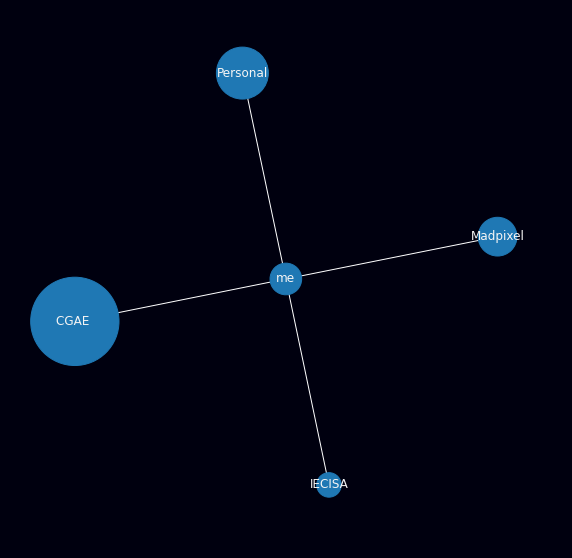

In [194]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline
import networkx as nx
from pyvis import network as net

# initialize graph
G=nx.Graph()


df_company = projects["Company"].value_counts().reset_index()
df_company.columns = ["Company", "Count"]
df_company = df_company.sort_values(by="Count", ascending=False)
#df_company.head(10)

G.add_node('me', color='red',size=1000, font_color='white') # intialize yourself as central
df_company_reduced = df_company.loc[df_company['Count']>=1]
df_company_reduced.head()

# use iterrows tp iterate through the data frame
for _, row in df_company_reduced.iterrows():

  # store company name and count
  company = row['Company']
  count = row['Count']

  title = f"<b>{company}</b> – {count}"
  positions = set([x for x in projects[company == projects['Company']]['ProjectName']])
  positions = ''.join('<li>{}</li>'.format(x) for x in positions)

  position_list = f"<ul>{positions}</ul>"
  hover_info = title + position_list

  G.add_node(company,color='red',size=count*300, title=hover_info)

  G.add_edge('me', company, color='grey')


node_color=[]
node_size=[]
for node in G.nodes():
    color = G.nodes[node]['color']
    node_color.append(color)
    size = G.nodes[node]['size']
    node_size.append(size)

#Draw the network digram assigning node_color and node_size using the lists established in the previous step and lavish in your new found network diagram greatness.
fig = plt.figure(figsize=(10,10))
plt.margins(x=0.1, y=0.1)
nx.draw(G, with_labels=True, node_size=node_size, edge_color='white', font_size=12, font_color="whitesmoke")
fig.set_facecolor("#00000F")

### 5. Word cloud

This is me defined with a word cloud.

In [197]:
from wordcloud import WordCloud 
text = list()
cols = ['JobTitle', 'Languages','IDE','Platforms']

for col in cols:
    for row in projects[col]:
        try:
            row_list = row.split(";")
        except:
            pass
        text =  text + row_list

text = " ".join(text)

wc = WordCloud(background_color="white", 
                         max_words=150, 
                         width=1800, 
                         height=600, 
                         stopwords=WordCloud.STOPWORDS).generate(text)

plt.figure(figsize = (15,5)) 
plt.imshow(wc, interpolation='bilinear') 
plt.axis("off") 
plt.show()

TypeError: 'module' object is not callable

Made with ❤️ by [Iñigo Jiménez](https://www.linkedin.com/in/inigojimenez)